<a href="https://colab.research.google.com/github/aprendizajecifuentes/Google_Colab_Ejercisios/blob/main/Normalizacion_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de Ventas_"Normalizacion de Texto"**


##**Ejercicio 1, Sesion 1, UND 9**
Visualización de Ventas por Categoría con un Gráfico de Barras

In [ ]:
#cargar datos dataframe
import pandas as pd
import matplotlib.pyplot as plt


url="https://drive.google.com/uc?export=download&id=1JS7jkpbWMaOlpsh_7Q6P8nue1U9aiM-C"
df=pd.read_csv(url)

print(df.head(10))

   Venta_ID       Fecha   Producto    Categoría  Cantidad Vendida  \
0         1  2023-06-01  Impresora  Electrónica                25   
1         2  2023-06-02      Mouse      Oficina                42   
2         3  2023-06-03      Mouse   Accesorios                11   
3         4  2023-06-04    Teclado   Accesorios                24   
4         5  2023-06-05    Monitor  Computación                17   
5         6  2023-06-06    Monitor   Accesorios                39   
6         7  2023-06-07      Mouse  Electrónica                 8   
7         8  2023-06-08     Laptop      Oficina                40   
8         9  2023-06-09      Mouse      Oficina                23   
9        10  2023-06-10    Monitor      Oficina                 5   

   Precio Unitario  
0          1215.98  
1           752.09  
2          2012.38  
3          1217.56  
4           413.41  
5           962.93  
6          1764.83  
7          1095.72  
8          1712.26  
9           715.40  


In [ ]:
#grupar las ventas por "Categoría" y sumar la "Cantidad Vendida".

df_agrupado=df.groupby('Categoría')['Cantidad Vendida'].sum()
print(df_agrupado)

Categoría
Accesorios     440
Computación    584
Electrónica    646
Oficina        414
Name: Cantidad Vendida, dtype: int64


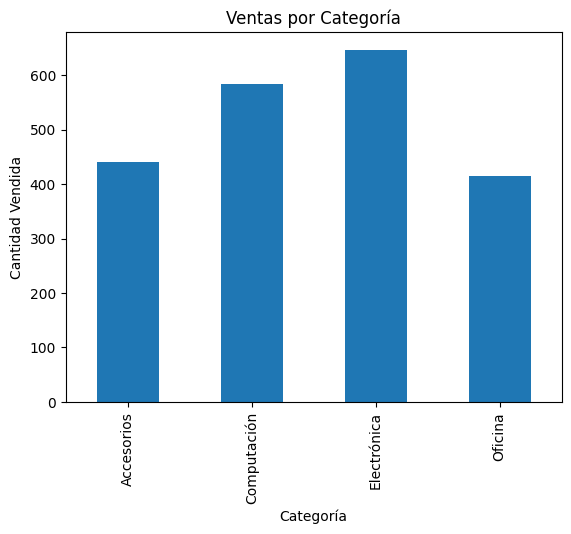

In [ ]:
#Generar un gráfico de barras para visualizar los resultados.
df_agrupado.plot(kind='bar')
plt.title('Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Vendida')
plt.show()

##**Ejercicio 2, Sesion 1, UND 9**
Análisis de Ventas a lo Largo del Tiempo con un Gráfico de Líneas

Totales de cantidad vendida por día:
        Fecha  Cantidad Vendida
0  2023-06-01                25
1  2023-06-02                42
2  2023-06-03                11
3  2023-06-04                24
4  2023-06-05                17
..        ...               ...
75 2023-08-15                14
76 2023-08-16                41
77 2023-08-17                 8
78 2023-08-18                28
79 2023-08-19                22

[80 rows x 2 columns] 



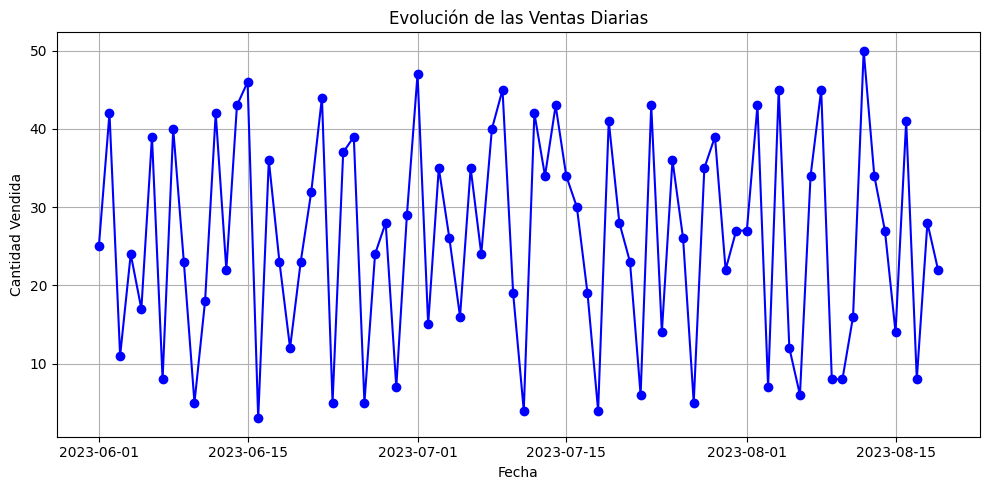

In [ ]:
#Convertir la columna "Fecha" al formato de fecha (datetime)
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')

ventas_diarias = df.groupby("Fecha")["Cantidad Vendida"].sum().reset_index()

#Normalizar nombre de columnas
df.columns = (
    df.columns
    .str.strip()                                   # Elimina espacios al inicio y al final
    .str.lower()                                  # Convierte todo a minúsculas
    .str.replace("á", "a")                        # Reemplaza tildes
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
    .str.replace("ñ", "n")                        # Reemplaza eñes si las hay
    .str.replace(" ", "_")                        # Reemplaza espacios internos por _
)

# 7️ Mostrar los resultados numéricos
print("Totales de cantidad vendida por día:")
print(ventas_diarias, "\n")

# 8️ Generar el gráfico de líneas
plt.figure(figsize=(10,5))
plt.plot(ventas_diarias["Fecha"], ventas_diarias["Cantidad Vendida"], marker='o', linestyle='-', color='blue')
plt.title("Evolución de las Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Cantidad Vendida")
plt.grid(True)
plt.tight_layout()
plt.show()




##**Ejercicio 3, Sesion 1, UND 9**
Visualización de la Distribución de Precios Unitarios con un Histograma

Estadísticas descriptivas de los Precios Unitarios:
count      80.000000
mean     1170.751250
std       686.683382
min       130.750000
25%       579.347500
50%      1127.125000
75%      1711.052500
max      2484.890000
Name: Precio Unitario, dtype: float64 



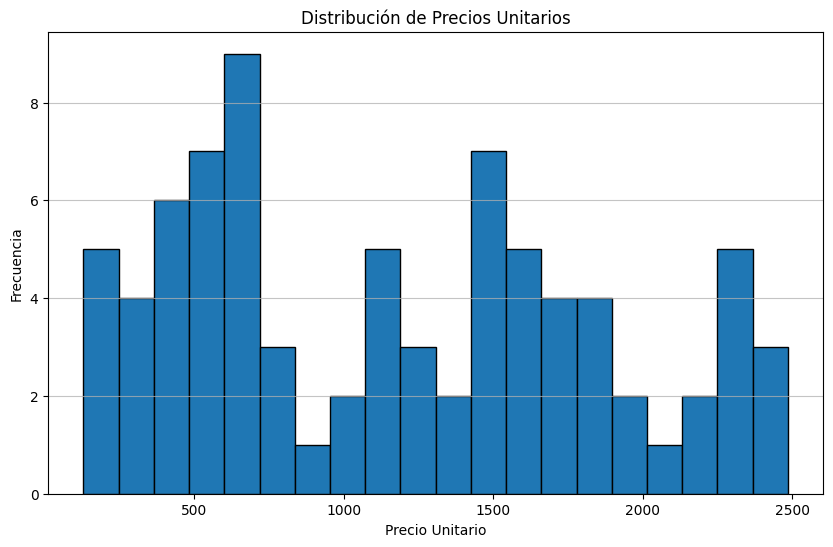

In [ ]:
# Seleccionar la columna "Precio Unitario"
precios_unitarios = df['Precio Unitario']

# Mostrar estadísticas descriptivas de los precios unitarios
print("Estadísticas descriptivas de los Precios Unitarios:")
print(precios_unitarios.describe(), "\n")

# Generar el histograma
plt.figure(figsize=(10, 6))
plt.hist(precios_unitarios, bins=20, edgecolor='black') # Puedes ajustar el número de 'bins' según sea necesario
plt.title('Distribución de Precios Unitarios')
plt.xlabel('Precio Unitario')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

##**Ejercicio 4, Sesion 1, UND 9**
Comparación de Ventas Totales por Producto con un Gráfico de Barras Horizontal

     Producto  Cantidad Vendida
1      Laptop               702
6     Teclado               323
0   Impresora               252
3       Mouse               249
2     Monitor               218
4  Smartphone               204
5      Tablet               136


<BarContainer object of 7 artists>

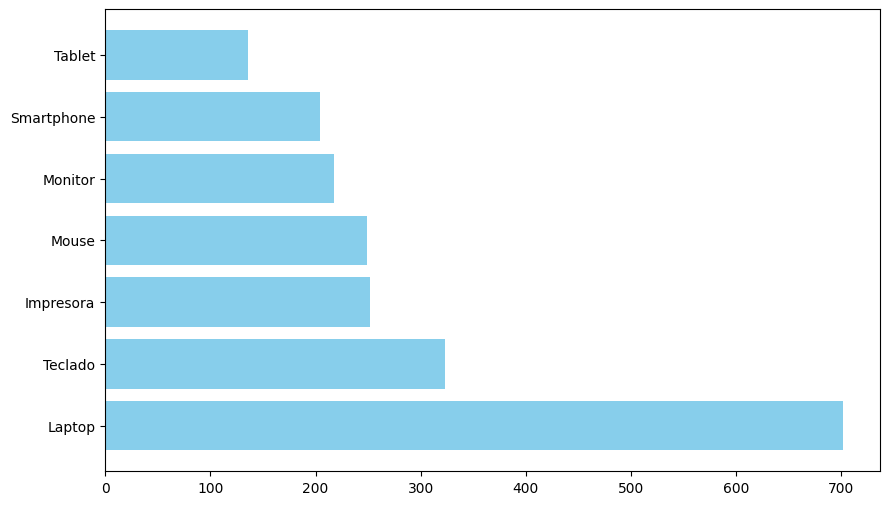

In [ ]:
#Agrupar los datos por "Producto" y calcular las ventas totales (Cantidad Vendida).
df_agrupado_producto = df.groupby('Producto')['Cantidad Vendida'].sum().reset_index()
df_agrupado_producto = df_agrupado_producto.sort_values(by='Cantidad Vendida', ascending=False)

print(df_agrupado_producto)

#Generar un gráfico de barras horizontal para comparar las ventas de cada producto.
plt.figure(figsize=(10, 6))
plt.barh(df_agrupado_producto['Producto'], df_agrupado_producto['Cantidad Vendida'], color='skyblue')


In [ ]:
#Normalizar nombre de columnas
df.columns = (
    df.columns
    .str.strip()                                   # Elimina espacios al inicio y al final
    .str.lower()                                  # Convierte todo a minúsculas
    .str.replace("á", "a")                        # Reemplaza tildes
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
    .str.replace("ñ", "n")                        # Reemplaza eñes si las hay
    .str.replace(" ", "_")                        # Reemplaza espacios internos por _
)

print(df.head(10))

   venta_id      fecha   producto    categoria  cantidad_vendida  \
0         1 2023-06-01  Impresora  Electrónica                25   
1         2 2023-06-02      Mouse      Oficina                42   
2         3 2023-06-03      Mouse   Accesorios                11   
3         4 2023-06-04    Teclado   Accesorios                24   
4         5 2023-06-05    Monitor  Computación                17   
5         6 2023-06-06    Monitor   Accesorios                39   
6         7 2023-06-07      Mouse  Electrónica                 8   
7         8 2023-06-08     Laptop      Oficina                40   
8         9 2023-06-09      Mouse      Oficina                23   
9        10 2023-06-10    Monitor      Oficina                 5   

   precio_unitario  
0          1215.98  
1           752.09  
2          2012.38  
3          1217.56  
4           413.41  
5           962.93  
6          1764.83  
7          1095.72  
8          1712.26  
9           715.40  


# **Normalizar data usando STR. **
### Ejercicio Extra

In [ ]:
# Normalizar valores dentro del DataFrame (solo columnas de texto)
for col in df.select_dtypes(include=["object", "string"]).columns:
    df[col] = (
        df[col]
        .astype(str)                     # Asegura que todo sea texto
        .str.strip()                     # Quita espacios al inicio/final
        .str.lower()                     # Convierte a minúsculas
        .str.replace("á", "a")           # Reemplaza acentos
        .str.replace("é", "e")
        .str.replace("í", "i")
        .str.replace("ó", "o")
        .str.replace("ú", "u")
        .str.replace("ñ", "n")
    )
print(df.head(10))

   venta_id      fecha   producto    categoria  cantidad_vendida  \
0         1 2023-06-01  impresora  electronica                25   
1         2 2023-06-02      mouse      oficina                42   
2         3 2023-06-03      mouse   accesorios                11   
3         4 2023-06-04    teclado   accesorios                24   
4         5 2023-06-05    monitor  computacion                17   
5         6 2023-06-06    monitor   accesorios                39   
6         7 2023-06-07      mouse  electronica                 8   
7         8 2023-06-08     laptop      oficina                40   
8         9 2023-06-09      mouse      oficina                23   
9        10 2023-06-10    monitor      oficina                 5   

   precio_unitario  
0          1215.98  
1           752.09  
2          2012.38  
3          1217.56  
4           413.41  
5           962.93  
6          1764.83  
7          1095.72  
8          1712.26  
9           715.40  


# **Normalizar texto usando funcion UNICODE**
### Ejercicio Extra

In [ ]:
import unicodedata

# === Función para normalizar texto ===
def normalizar_texto(texto):
    if not isinstance(texto, str):
        return texto  # si no es string, lo dejamos igual

    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar tildes y acentos
    texto = ''.join(
        c for c in unicodedata.normalize('NFKD', texto)
        if not unicodedata.combining(c)
    )

    # Quitar espacios extra
    texto = ' '.join(texto.split())

    return texto

for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].apply(normalizar_texto)

print(df.head(10))


   venta_id      fecha   producto    categoria  cantidad_vendida  \
0         1 2023-06-01  impresora  electronica                25   
1         2 2023-06-02      mouse      oficina                42   
2         3 2023-06-03      mouse   accesorios                11   
3         4 2023-06-04    teclado   accesorios                24   
4         5 2023-06-05    monitor  computacion                17   
5         6 2023-06-06    monitor   accesorios                39   
6         7 2023-06-07      mouse  electronica                 8   
7         8 2023-06-08     laptop      oficina                40   
8         9 2023-06-09      mouse      oficina                23   
9        10 2023-06-10    monitor      oficina                 5   

   precio_unitario  
0          1215.98  
1           752.09  
2          2012.38  
3          1217.56  
4           413.41  
5           962.93  
6          1764.83  
7          1095.72  
8          1712.26  
9           715.40  
